# Normal Mode Analysis of a Coupled Pendulum System

Elias Taira

## Introduction

In this essay, we will be taking a look at the properties of a coupled pendulums and analyzing it's phase plots and equations of motion for a select few different parameters.

The layout of the system itself is quite simple: It uses two pendulums bound together by a spring. For the sake of simplicity, we will make it so that both of the pendulums have strings of length $R$ and a mass of $m$. At any given point, the two pendulums will make an angle $\theta_1$ and $\theta_2$ with the normal of the surface to which the string is attached to for masses 1 and 2 respectively. The spring connecting the two masses will have a spring constant of $k$

<img src="double_pendulums.jpg" width="300"/>

Additionally, we will also be working under the Small Angle Approximation for the entirety of the essay as allowing the weights to oscillate too far from their resting point will result in the calculations becoming far more complicated, making it much more difficult to compare our numerical results with our analytical results.

As for any history behind this system, it is simply an extension of the pendulum which came to popularity in the field of science in 1602 when Galileo first began utilizing the pendulum in his experimentation. From here, the pendulum would go on to become used in the development of other devices such as the pendulum clock as well as become a very useful tool for illustrating oscillatory motion.

It wasn't until about 60 years later when Dutch methematician Christiaan Huygens discovered the concept of coupled oscillations after hanging two pendulumn clocks on a mantlepiece and noticing how the motion of these clocks actually interfered with one another. Like the single pendulum, this device has also become a very popular model for illustrating coupled oscillation in many different contexts.

### Equations of Motion

For this investigation, we will be performing a Lagrangian analysis of the system. To do this, we will require the equations for potential and kinetic energy of both masses

For the potential energy we initially find the equation to be:

$$U = mgl(1 - \cos{\theta_1}) + mgl(1-\cos{\theta_2}) + \frac{1}{2}(x_2 - x_1)^2$$

However, since we are using the small angle approximation, we will assume that each $\cos$ term is equal to the 1st two terms of its taylor expansion: $1 - \frac{\theta^2}{2}$. By sustituting this value into our potential equation, we find that our potential is now:

$$U = \frac{mg}{2l}(x_1^2 + x_2^2) + \frac{1}{2}k(x_2 - x_1)^2$$

Here we notice that the potential only depends on the position of the system in 1 dimension. This is due to the fact that the small angle approximation assumes that the neither of the two masses will ever vary significantly in terms of their y-position, so we do not have to account for it. Of course, by generating the initial conditions in certain ways we would most certianly see significant varialtion in the y-direction, so for this problem, we must be extra careful to start our system at positions very close to the lowest points on both pendulums to minimize the movement in the y-direction.

Keeping this information in mind, we find that the kinetic energy of this system is:

$$T = \frac{1}{2}m(\dot{x_1}^2 + \dot{x_2}^2) $$

Where $T$ also varies in only the x-direction to keep with the assumptions that we set above.

Combining these two terms together, we find that the Lagrangian for this system becomes:

$$L = \frac{1}{2}m(\dot{x_1}^2 + \dot{x_2}^2) - (\frac{mg}{2l}(x_1^2 + x_2^2) + \frac{1}{2}k(x_2 - x_1)^2) $$

Now, appliying the Lagrangian Equation:

$$\frac{d}{dt}(\frac{dL}{d\dot{x}}) - \frac{dL}{dx} = 0$$

For $x_1$ and $x_2$, we find:

$$m\ddot{x_1} + \frac{mgx_1}{l}-k(x_2 - x_1) = 0$$

$$m\ddot{x_2} + \frac{mgx_2}{l}+k(x_2 - x_1) = 0$$

Then once solving for $\ddot{x}$:

$$\ddot{x_1} = -\frac{g}{l}x_1+\frac{k}{m}(x_2 - x_1)$$

$$\ddot{x_2} = -\frac{g}{l}x_2-\frac{k}{m}(x_2 - x_1)$$

We can also represent this sysem by utilizing matricies:

$$
\left(\begin{array}{cc} 
\ddot{x_1}\\ 
\ddot{x_2}
\end{array}\right)
=
\left(\begin{array}{cc} 
-(\frac{g}{l} + \frac{k}{m}) & \frac{k}{m} \\
\frac{k}{m} & -(\frac{g}{l} + \frac{k}{m})
\end{array}\right)
\left(\begin{array}{cc} 
x_1\\ 
x_2
\end{array}\right)
$$ 

### Normal Mode Analysis

Next we will show how to find the normal modes of this system. To do so, all we need to do is find the eigenvalues and eigenvectors of the 2x2 matrix we found above.

To make things easier to display, we'll be using the matrix functionality of the Sympy package to find these values.

In [1]:
import sympy as sm

g, l, k, m = sm.symbols('g l k m')

M = sm.Matrix([[-(g/l + k/m), k/m],[k/m, -(g/l + k/m)]])

M

Matrix([
[-g/l - k/m,        k/m],
[       k/m, -g/l - k/m]])

Now that we have our sympy matrix object, finding the eigenvectors and eigenvalues is simple.

In [2]:
eigvects = M.eigenvects()

print("The eigenvector / eigenvalue pairs are: ")

# some strange indexing with how the eigenvectors and eigenvalues are stored
print("The eigenvalue",eigvects[0][0]," with eigenvector", eigvects[0][2][0])

# this eigenvalue needs some simplification
print("The eigenvalue",eigvects[1][0]," with eigenvector", eigvects[1][2][0])

The eigenvector / eigenvalue pairs are: 
The eigenvalue -g/l  with eigenvector Matrix([[1], [1]])
The eigenvalue (-g*m - 2*k*l)/(l*m)  with eigenvector Matrix([[-1], [1]])


With this, and our knowledge of normal mode amplitudes and frequencies, we find that we have two normal modes of our system. 

The first normal mode has a frequency and amplitude of
$\sqrt{\frac{g}{l}}$ and $\left(\begin{array}{cc}1\\ 1\end{array}\right)$ respectively

And for the other normal mode, we have a frequency and amplitude of
$\sqrt{\frac{g}{l} + \frac{2k}{m}}$ and $\left(\begin{array}{cc}-1\\1\end{array}\right)$

### Analytical Solutions

We will now show the analytical solutions to the above equations of motion for which we will be utilizing later on in this essay:

$$x_1 = A\cos(\sqrt{\frac{g}{l}}t) + B\cos(\sqrt{\frac{g}{l} + \frac{2k}{m}}t)$$

$$x_2 = A\cos(\sqrt{\frac{g}{l}}t) - B\cos(\sqrt{\frac{g}{l} + \frac{2k}{m}}t)$$

Where $A$ and $B$ are constants that depend on the initial conditions of the system

One interesting thing to note about the above equations is that the terms inside the $\cos$ values are the two normal frequencies that we found above, and that the signs next to each of the cosine terms also corresponds to the above normal amplitdes. This is becuase these general solutions are *linear combinations* of the two normal modes of the system, and by changing the respective contributions of these modes, we can create any possible type of oscillation that the system is capable of creating.

## Numerical Analysis

Now with these results, we now move onto our numerical analysis.

As per usual, we import the standard libraries that we usually utilize.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Below, we create our show the equations of motion for the coupled pendulum 

In [4]:
def coupled_oscillator(r, t, k, l, m, g):
    """
    Arguments:
        r: a list of the position and velocity values for masses x1 and x2
        which are ordered [x1, v1, x2, v2]

        t: represents the current time, only included so odeint() runs
        properly. Has no actual use inside the function

        k: the spring coefficient of the spring connecting the two masses
        together, the higher this coefficient is, the more strongly bound
        the two masses are to one another
        
        l: the length of the string. Longer strings result in a system that
        depends more on the force of the spring connecting the two masses as
        well as allow the small angle approximation to hold up for a wider 
        range of values
        
        m: the mass of each weight. Altering the weight influences how much
        the spring force connects the two masses dominates the system.
        Increasing the mass lowers the spring's influence, while loweing it
        increases the spring's influence
        
        g: acceleration due to the force of gravity exerted on the two masses.
        Increasing/decreasing this acceleration will increase/decrease the
        dominance of the pendulums' motion in the system
    
    Returns:
        [x1dot, x1ddot, x2dot, x2ddot]: a list of the velocity and acceleration
        values of x1 and x2 respectively
    """
    
    # unpacking position/velocity list
    x1, x1_dot, x2, x2_dot = r
    
    # assinging velocities
    x1_dot = x1_dot
    
    x2_dot = x2_dot
    
    # calculating acceleration values
    x1_ddot = -(g/l)*x1 +(k/m)*(x2 - x1)
    
    x2_ddot = -(g/l)*x2 -(k/m)*(x2 - x1) 
    
    return x1_dot, x1_ddot, x2_dot, x2_ddot

Now we run the integration. For our initial conditions, we will stick with a relatively simple condition in which the weights are relatively close to their resting positions ([$x1 = 0.1, v1 = 0, x2 = 0, v2 = 0$]). As for the constants, so long as they aren't too extreme, as to cause the small angle approximation to no longer be valid, then any values should be fine. For $g$, it will be set to $9.81$ as to be in line with the acceleration due to Earth's gravity, $l$ will be set to 2 to ensure the string is sufficiently long enough to ensure that he small angle approximation holds, $k$ will be set to 5 to allow for a larger number of oscillations to be observed within the 10-second time span, and $m$ is set to 1 to avoid influencing the overall system.

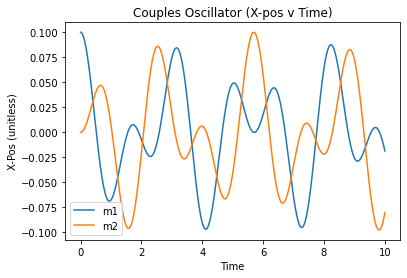

In [5]:
# setting time array
t_arr = np.linspace(0,10,1000)

# setting initial conditions
r0 = [0.1, 0, 0, 0]

#setting constants
g = 9.81
l = 2
k = 5
m = 1

# running integration
r = odeint(coupled_oscillator, r0, t_arr, args = (k, l, m, g))

# saving position data
x1 = r[:,0]
x2 = r[:,2]

# plotting data from integration
plt.plot(t_arr, x1, label = "m1")
plt.plot(t_arr, x2, label = "m2")
plt.xlabel("Time")
plt.ylabel("X-Pos (unitless)")
plt.title("Couples Oscillator (X-pos v Time)")
plt.legend()

**Fig 1.** The above plot shows the motion of the two masses as a function of time. One feature of the plot that is of note, is the fact that the masses seem to switch positions as they swing which, if we look at the first image at the star t of this essay that this model is supposed to represent, this should never happen. The explanation for this, is that both masses axtually exist in their own coordinate systems, offset from one another by the length of the spring which in this system, is completely arbitrary. So if we were to create a new plot that more accurately represented the physical system, the masses would never actually cross paths with one another at any point in time.

Now, with this system plotted, we can then compare these results to the analytical solutions (i.e. the linear combination of the normal modes of the system).

Should the analytical solutions be correct, we should be able to take the initial conditions and constant values for the above system and use them to find the values of A and B to create a plot that looks exactly the same as the numerical solution.

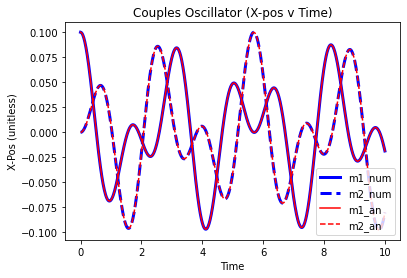

In [6]:
t_arr = np.linspace(0,10,1000)

# Plugging in the initial conditions resulted in both A and B being equal to 0.5
x1_an = 0.5*np.cos(np.sqrt(g/l)*t_arr) + 0.5*np.cos(np.sqrt(g/l + 2*k/m)*t_arr)

x2_an = 0.5*np.cos(np.sqrt(g/l)*t_arr) - 0.5*np.cos(np.sqrt(g/l + 2*k/m)*t_arr)

# plotting numerical solutions
plt.plot(t_arr, x1, "b-", label = "m1_num", linewidth = 3)
plt.plot(t_arr, x2, "b--", label = "m2_num", linewidth = 3)

# plotting analytical solutions
plt.plot(t_arr, x1, "r-", label = "m1_an")
plt.plot(t_arr, x2, "r--", label = "m2_an")

# adding plot labels
plt.xlabel("Time")
plt.ylabel("X-Pos (unitless)")
plt.title("Couples Oscillator (X-pos v Time)")
plt.legend()

**Fig 2.** Above we see the a plot that is similar to *Fig 1.*, except now we are plotting both the analytical and numerical solutions on top of one another. To make the numerical solutions more obvious, they were plotted with thicker lines. As seen from the plot, it appears as though the two solutions perfectly match one another

Of course, this was a very simple system, but it does a very good job of illustrating how changing the contributions of the normal nodes can be used to generate all possible oscillations that this system is capable of producing. Had we a more complex system, with non-zero velocities, we would certainly be able to find a value for A and B in that would generate the appropriate combination of normal nodes to describe the motion that the two masses would undergo.

## Works Cited

For the Love of Physics. (2021, April 5). Coupled pendulum (normal modes and frequencies) | lagrangian | eom - matrix form. YouTube. Retrieved October 31, 2022, from https://www.youtube.com/watch?v=M-hLBxx7MeE 

Idema, T. (2021, February 28). 8.4: Coupled oscillators. Physics LibreTexts. Retrieved October 31, 2022, from https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_Mechanics_and_Relativity_(Idema)/08%3A_Oscillations/8.04%3A_Coupled_Oscillators 

Physicscatalyst. (2021, June 5). Coupled pendulums: Two pendulums connected by a Spring. Learn about education and B.Sc. Physics. Retrieved October 31, 2022, from https://physicscatalyst.com/graduation/coupled-pendulums/#:~:text=Obtain%20the%20equations%20of%20motion,spring)%20using%20the%20Lagrangian%20method.&amp;text=The%20displacement%20of%20 

Wikimedia Foundation. (2022, October 28). Pendulum. Wikipedia. Retrieved October 31, 2022, from https://en.wikipedia.org/wiki/Pendulum 